# 01 - Calculating and comparing rates of return

Reference : https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/learn/lecture/6779998#overview (!!!highly recommended!!!)


Learning Goal;
1. Calculating the return of a single security
2. Calculating the return of a portfolio of securities ( stock indicies, etc..)
3. Risk, Standard deviation and Variance
4. Relationship between securities (Correlation and Covariance, and calculations )
5. Regressions; how to run regressions, $\alpha$, $\beta$, $R^2$
6. Markowitz's Portfolio Theory: 
  a. CAPM (Capital Asset Pricing Model ) : the most widely used asset pricing model
  b. Calculating Cost of Capital
  c. Sharp Ratio
7. Monte Carlo Simulation
  a. Derivatives Pricing
  b. Stock Pricing
  c. Corporate Finance
  

## Rate of Return

We can use 2 different methods to calculate rate of return:

- Simple rate of return : Preferred for multiple assets over the same timeframe
- Logarithmic rate of return : Preferred for a single asset over time

1. Simple rate of return

```python
simpleRateOfReturn = (endpingPrice - beginningPrice) / beginningPrice
```

2. Logarithmic rate of return

```python
logRateOfReturn = log(endingPrice/begininngPrice) = log endpingPrice - log beginingPrice
```

### Formula for Yearly Return

```python
yearlyReturn = [(dailyReturn+1)^365] * 100 -1  # This formula converts daily, monthly, and quarterly returns to yearly
```














In [6]:
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [8]:
MSFT = web.DataReader('MSFT', data_source='yahoo',start='2020-01-01')

In [10]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,211.330002,205.029999,209.559998,208.039993,32179400.0,208.039993
2020-07-16,205.699997,202.309998,205.399994,203.919998,29940700.0,203.919998
2020-07-17,205.039993,201.389999,204.470001,202.880005,31635300.0,202.880005
2020-07-20,212.300003,203.009995,205.000000,211.600006,36801800.0,211.600006
2020-07-21,213.940002,208.029999,213.660004,208.750000,36663976.0,208.750000


## Simple Rate of Return

$$
\frac{P1 - P0}{P0} = \frac{P1}{P0} - 1
$$

In [11]:
# Daily return
MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1

In [14]:
print (MSFT['simple_return'])

Date
2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2020-07-15   -0.001488
2020-07-16   -0.019804
2020-07-17   -0.005100
2020-07-20    0.042981
2020-07-21   -0.013469
Name: simple_return, Length: 139, dtype: float64


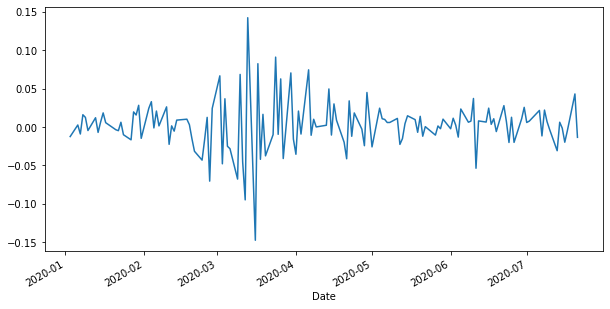

In [24]:
MSFT['simple_return'].plot(figsize=(10,5)) # creates a graph with 8,5
plt.show()

In [25]:
# Calculate average daily return
avg_returns_daily = MSFT['simple_return'].mean()  # pandas.DataFrame.mean()
avg_returns_daily

0.0024879666294645095

In [26]:
# Calculate average return per year
avg_returns_anually = MSFT['simple_return'].mean()*250  # 250 Number of trading days in a year  
avg_returns_a

0.6219916573661274

In [ ]:
print str(round(avg_))